In [219]:
#########################################
# BCI competition III dataset IVa
# Subject al
# HW 1
# Jurio created, wl edited
# 10/16, 2023
##########################################

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import ShuffleSplit, cross_val_score

import mne
from mne.decoding import CSP

from scipy.io import loadmat
from sklearn.pipeline import Pipeline

# Path
data_path = './EEG dataset/'
result_path = './Results/'

if os.path.exists(result_path) is False:
    os.makedirs(result_path)

# load EEG.mat
data = loadmat(data_path + 'data_set_IVa_al.mat')
labels = loadmat(data_path + 'true_labels_al.mat')

# EEG signals
eeg_data = data['cnt']

# Target y
target = data['mrk']['y'][0][0][0]
target_label = labels['true_y'] - 1
events_id = dict(right=0, foot=1)
right_id = np.where(target_label==0)[1]
foot_id = np.where(target_label==1)[1]

# time pos
cues_pos = data['mrk']['pos'][0][0][0]

# Info
data_name = data['nfo']['name'][0][0][0]
eeg_fs = data['nfo']['fs'][0][0][0][0]
ch_name = data['nfo']['clab'][0][0][0]
ch_x = data['nfo']['xpos'][0][0]
ch_y = data['nfo']['ypos'][0][0]
ch_pos = 0.1 * np.hstack((ch_x, ch_y, np.zeros(ch_x.shape))) # 使用0补全z方向

# MNE object
info = mne.create_info(
    ch_names=[i[0] for i in ch_name],
    sfreq=eeg_fs,
    ch_types='eeg')
pos_dic = dict(zip(info.ch_names, ch_pos))
montage = mne.channels.make_dig_montage(pos_dic)
info.set_montage(montage)

C:\Users\Ts200\AppData\Local\Temp\ipykernel_9904\3686322200.py:63: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AFp1, Fpz, AFp2, Fp2, AF7, AF3, AF4, AF8, FAF5, FAF1, FAF2, ...
 chs: 118 EEG
 custom_ref_applied: False
 dig: 121 items (3 Cardinal, 118 EEG)
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 118
 projs: []
 sfreq: 100.0 Hz
>

## Task1

In [220]:
raw = mne.io.RawArray(eeg_data.T, info)
# raw.filter(12, 28, fir_design="firwin", skip_by_annotation="edge")

# Events and epochs
# Events
events = np.vstack((cues_pos, np.zeros(len(cues_pos)), target_label[0, :])).T.astype(int)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")
# Cue onset
# Epochs
epochs = mne.Epochs(
    raw,
    events,
    events_id,
    0,
    3.5,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

# # time domain
# raw.crop(tmax=100)
# # plot electrode position
# plt.figure(figsize=(4,6))
# raw.plot_sensors(title='Channel positions')
# plt.savefig('Results\sensors.png')
# plt.show()

# # plot raw eeg data
# plt.figure(figsize=(4,6))
# raw.plot(n_channels=10, scalings='auto', title='Raw EEG Signals')
# plt.show()

# plt.figure(figsize=(4,6))
# raw.plot(n_channels=118,scalings='auto', title='Raw EEG Signals')
# plt.show()

# ================== plot frequency spectrum
# raw.compute_psd().plot()
# plt.tight_layout()
# plt.savefig('Results\spectrum.png')
# plt.show()
# raw.compute_psd().plot_topo(color="k", fig_facecolor="w", axis_facecolor="w")
# plt.tight_layout()
# plt.savefig('Results\spectrum_all.png')
# plt.show()



# ============================ plot time-frequency features
# freqs = np.logspace(*np.log10([12, 28]), num=8)
# n_cycles = freqs / 2.0  # different number of cycle per frequency
# power, itc = mne.time_frequency.tfr_morlet(
#     epochs,
#     freqs=freqs,
#     n_cycles=n_cycles,
#     use_fft=True,
#     return_itc=True,
#     decim=3,
#     n_jobs=None,
# )
# power.plot_joint(
#     baseline=(0, 0.5), mode="mean", tmin=0, tmax=3.5,
#     timefreqs=[(0.5, 13), (1, 13),(2.8, 13)]
# )
# plt.show()


# epochs[right_id].compute_psd().plot_topomap(ch_type="eeg", agg_fun=np.mean, normalize=True)
# plt.savefig(r'Results\right_compute_psd_plot_topomap.png')
# plt.show()
# epochs[foot_id].compute_psd().plot_topomap(ch_type="eeg", agg_fun=np.mean, normalize=True)
# plt.savefig(r'Results\foot_compute_psdplot_topomap.png')
# plt.show()

Creating RawArray with float64 data, n_channels=118, n_times=283574
    Range : 0 ... 283573 =      0.000 ...  2835.730 secs
Ready.
Not setting metadata
280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 280 events and 351 original time points ...
0 bad epochs dropped


## Task 2

Creating RawArray with float64 data, n_channels=118, n_times=283574
    Range : 0 ... 283573 =      0.000 ...  2835.730 secs
Ready.
Not setting metadata
280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 280 events and 351 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

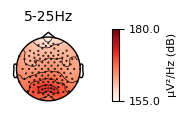

<Figure size 640x480 with 0 Axes>

    Using multitaper spectrum estimation with 7 DPSS windows


<Figure size 640x480 with 0 Axes>

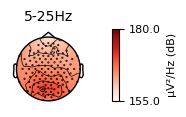

<Figure size 640x480 with 0 Axes>

Effective window size : 3.510 (s)


<Figure size 640x480 with 0 Axes>

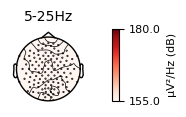

In [276]:
raw = mne.io.RawArray(eeg_data.T, info)
from scipy.signal import welch


# raw.filter(12, 28, fir_design="firwin", skip_by_annotation="edge")

# Events and epochs
# Events
events = np.vstack((cues_pos, np.zeros(len(cues_pos)), target_label[0, :])).T.astype(int)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")
# Cue onset
# Epochs
epochs = mne.Epochs(
    raw,
    events,
    events_id,
    0,
    3.5,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
# for i_ch in range(len(ch_name)):
#     f, pxx0 = welch(epochs.get_data()[right_id,i_ch,:], fs=eeg_fs)
#     f, pxx1 = welch(epochs.get_data()[foot_id,i_ch,:], fs=eeg_fs)
#     plt.figure()
#     plt.plot(f,10 * np.log10(pxx0.mean(axis=0)),'r',linewidth=2)
#     plt.plot(f,10 * np.log10(pxx1.mean(axis=0)),'g',linewidth=2)
#     plt.xlim([5,40])
#     plt.xlabel('[Hz]',fontsize=16)
#     plt.ylabel('[dB]',fontsize=16)
#     plt.legend(['Right','Foot'],fontsize=16)
#     plt.xticks(fontsize=16)  # 设置 x 轴刻度标签的字体大小为 12
#     plt.yticks(fontsize=16)  # 设置 y 轴刻度标签的字体大小为 12
#     plt.title(list(ch_name)[i_ch][0], fontsize=16)
#     plt.tick_params(axis='both', which='major', width=2)  # 设置主要刻度线的宽度为 2
#     # 设置顶部边框的粗细
#     plt.gca().spines['top'].set_linewidth(2)

#     # 设置底部边框的粗细
#     plt.gca().spines['bottom'].set_linewidth(2)

#     # 设置左侧边框的粗细
#     plt.gca().spines['left'].set_linewidth(2)

#     # 设置右侧边框的粗细
#     plt.gca().spines['right'].set_linewidth(2)

#     plt.savefig(f'Results\\topomap\\{list(ch_name)[i_ch][0]}.png')

plt.figure()
epochs[right_id].compute_psd().plot_topomap(vlim=(155,180),bands={"5-25Hz":(5,25)},ch_type="eeg", agg_fun=np.mean, dB=True)
plt.savefig(f'Results\\topomap_r.png')
plt.show()

plt.figure()
epochs[foot_id].compute_psd().plot_topomap(vlim=(155,180),bands={"5-25Hz":(5,25)},ch_type="eeg", agg_fun=np.mean, dB=True)

plt.savefig(f'Results\\topomap_f.png')

plt.show()

plt.figure()
raw.compute_psd(tmin=0,tmax=3.5).plot_topomap(vlim=(155,180),bands={"5-25Hz":(5,25)},ch_type="eeg", agg_fun=np.mean, dB=True)

plt.savefig(f'Results\\topomap_f.png')

Creating RawArray with float64 data, n_channels=118, n_times=283574
    Range : 0 ... 283573 =      0.000 ...  2835.730 secs
Ready.
Not setting metadata
280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 280 events and 351 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 3.4e+04 (2.2e-16 eps * 118 dim * 1.3e+18  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e+04 (2.2e-16 eps * 118 dim * 1.3e+18  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.


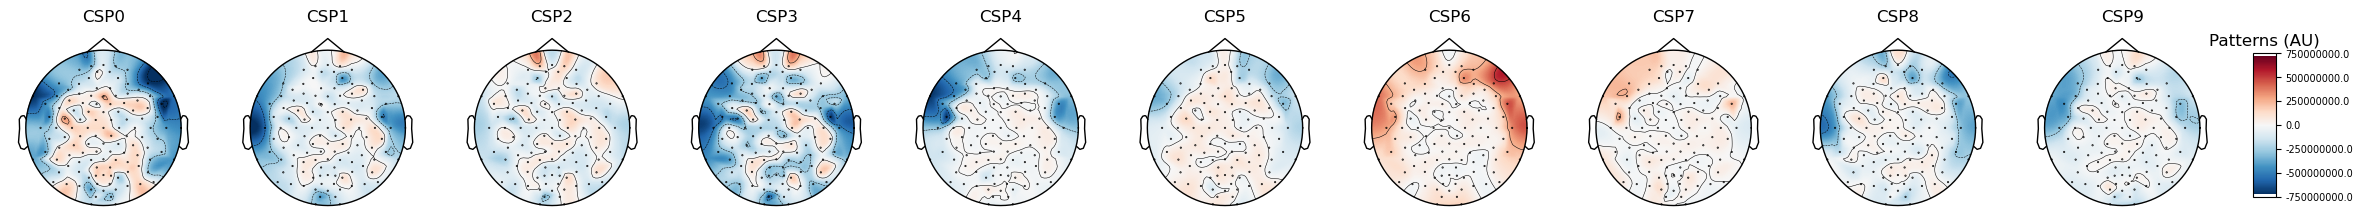

In [278]:
raw = mne.io.RawArray(eeg_data.T, info)
from scipy.signal import welch


# raw.filter(12, 28, fir_design="firwin", skip_by_annotation="edge")

# Events and epochs
# Events
events = np.vstack((cues_pos, np.zeros(len(cues_pos)), target_label[0, :])).T.astype(int)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")
# Cue onset
# Epochs
epochs = mne.Epochs(
    raw,
    events,
    events_id,
    0,
    3.5,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

x = epochs.get_data()
y = target_label[0, :] 
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)
csp.fit_transform(x, y)
csp.plot_patterns(epochs.info, ch_type="eeg", units="Patterns (AU)", size=1.5)
plt.show()


In [279]:
# Set
t_win_len = [10, 20, 30, 35]
# t_win_len = [25, 30]
t_step = 1
test_r = 0.1

# BP Filter
l_fr, h_fr = 12.0, 28.0

# Search or best result
tMin, tMax = [], []
for i in range(len(t_win_len)):
    tMin.append(np.array([i for i in range(0, 36 - t_win_len[i], t_step)]) / 10)
    tMax.append(tMin[i] + t_win_len[i] / 10)
tMin, tMax

([array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
         1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
         1.3, 1.4, 1.5]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
  array([0.])],
 [array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
         2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
  array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
         3.3, 3.4, 3.5]),
  array([3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
  array([3.5])])

In [280]:
# BP Filter
l_fr, h_fr = 12.0, 28.0
tMin, tMax = 0.5, 3.5

# MNE object
info = mne.create_info(
    ch_names=[i[0] for i in ch_name],
    sfreq=eeg_fs,
    ch_types='eeg')
pos_dic = dict(zip(info.ch_names, ch_pos))
montage = mne.channels.make_dig_montage(pos_dic)

info.set_montage(montage)
raw = mne.io.RawArray(eeg_data.T, info)
# Apply band-pass filter
raw.filter(l_fr, h_fr, fir_design="firwin", skip_by_annotation="edge")

# Decoding


events = np.vstack((cues_pos, np.zeros(len(cues_pos)), target_label[0, :])).T.astype(int)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Epochs
epochs = mne.Epochs(
    raw,
    events,
    events_id,
    tMin,
    tMax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

# Prepare data for training
x = epochs.get_data()
y = target_label[0, :] - 1

# ten-fold cross-validation
cv = ShuffleSplit(10, test_size=test_r, random_state=42)

# Classification with LDA on CSP features
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)

clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, x, y, cv=cv, n_jobs=None)





print(scores)

Creating RawArray with float64 data, n_channels=118, n_times=283574
    Range : 0 ... 283573 =      0.000 ...  2835.730 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 28 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 28.00 Hz
- Upper transition bandwidth: 7.00 Hz (-6 dB cutoff frequency: 31.50 Hz)
- Filter length: 111 samples (1.110 s)



C:\Users\Ts200\AppData\Local\Temp\ipykernel_9904\3417203229.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 280 events and 301 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None


[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    1.1s finished


    Using tolerance 2.4e+03 (2.2e-16 eps * 118 dim * 9.3e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e+03 (2.2e-16 eps * 118 dim * 8.7e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e+03 (2.2e-16 eps * 118 dim * 9.3e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e+03 (2.2e-16 eps * 118 dim * 8.8e+16  max singular value)
    Estimated rank (m

In [326]:
# BP Filter
l_fr, h_fr = 12.0, 28.0
tMin, tMax = 0.5, 3.5

# MNE object
info = mne.create_info(
    ch_names=[i[0] for i in ch_name],
    sfreq=eeg_fs,
    ch_types='eeg')
pos_dic = dict(zip(info.ch_names, ch_pos))
montage = mne.channels.make_dig_montage(pos_dic)

info.set_montage(montage)
raw = mne.io.RawArray(eeg_data.T, info)
# Apply band-pass filter
raw.filter(l_fr, h_fr, fir_design="firwin", skip_by_annotation="edge")

# Decoding


events = np.vstack((cues_pos, np.zeros(len(cues_pos)), target_label[0, :])).T.astype(int)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Epochs
epochs = mne.Epochs(
    raw,
    events,
    events_id,
    tMin,
    tMax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

# Prepare data for training
x = epochs.get_data()
y = target_label[0, :]

# ten-fold cross-validation
cv = ShuffleSplit(10, test_size=test_r, random_state=42)

# Classification with LDA on CSP features
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)
clf = Pipeline([("CSP", csp), ("LDA", lda)])

from sklearn.metrics import accuracy_score

train_x, test_x = x[:224], x[224:]
train_y, test_y = y[:224], y[224:]

clf.fit(train_x,train_y)

pred1 = clf.predict(train_x)
accuracy1 = accuracy_score(train_y,pred1)
print('在训练集上的精确度: %.4f'%accuracy1)

pred2 = clf.predict(test_x)
accuracy2 = accuracy_score(test_y,pred2)
print('在测试集上的精确度: %.4f'%accuracy2)



Creating RawArray with float64 data, n_channels=118, n_times=283574
    Range : 0 ... 283573 =      0.000 ...  2835.730 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 28 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 28.00 Hz
- Upper transition bandwidth: 7.00 Hz (-6 dB cutoff frequency: 31.50 Hz)
- Filter length: 111 samples (1.110 s)



C:\Users\Ts200\AppData\Local\Temp\ipykernel_9904\2655572424.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 280 events and 301 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None


[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    1.0s finished


    Using tolerance 2.1e+03 (2.2e-16 eps * 118 dim * 8.1e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e+03 (2.2e-16 eps * 118 dim * 8.6e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
在训练集上的精确度: 0.9955
在测试集上的精确度: 1.0000


In [331]:
# 模型比较
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)
clf_lda = Pipeline([("CSP", csp), ("LDA", lda)])
scores_lda = cross_val_score(clf_lda, x, y, cv=cv, n_jobs=None)

lr = LogisticRegression()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)
clf_lr = Pipeline([("CSP", csp), ("LR", lr)])
scores_lr = cross_val_score(clf_lr, x, y, cv=cv, n_jobs=None)

rfc = RandomForestClassifier()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)
clf_rfc = Pipeline([("CSP", csp), ("RFC", rfc)])
scores_rfc = cross_val_score(clf_rfc, x, y, cv=cv, n_jobs=None)
print(scores_lda, scores_lr, 'scores_svc', scores_rfc)

Computing rank from data with rank=None
    Using tolerance 2.3e+03 (2.2e-16 eps * 118 dim * 8.7e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e+03 (2.2e-16 eps * 118 dim * 9.3e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e+03 (2.2e-16 eps * 118 dim * 8.8e+16  max singular value)
    Estimated rank (mag): 118
    MAG: rank 118 computed from 118 data channels with 0 projectors
Reducing data rank from 118 -> 118
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e+03 (2.2e-16 eps * 118 dim * 9.3e+16  m

In [330]:
lda = LinearDiscriminantAnalysis()
scores_lda_only = cross_val_score(lda, x.reshape(-1,118*301), y, cv=cv, n_jobs=None)
print(scores_lda_only)

[0.57142857 0.53571429 0.67857143 0.67857143 0.5        0.46428571
 0.53571429 0.60714286 0.57142857 0.60714286]


In [327]:
x.shape

(280, 118, 301)

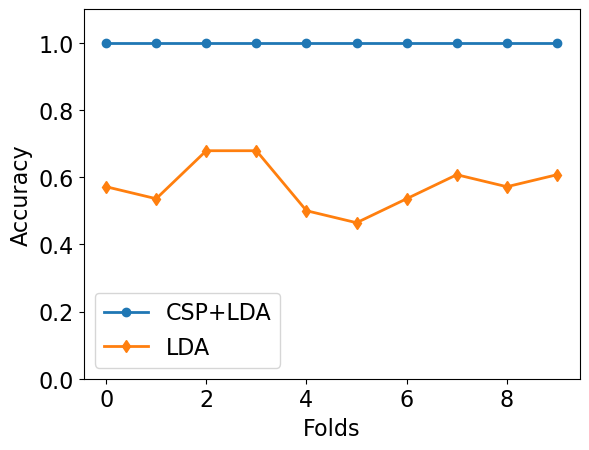

In [340]:
plt.plot(scores_lda,'-o',linewidth=2)
plt.plot(scores_lda_only,'-d',linewidth=2)
plt.xlabel('Folds',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend(['CSP+LDA','LDA'],fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1.1])
plt.show()

In [324]:
scores_lr.mean(), scores_lr.std(), scores_rfc.mean(), scores_rfc.std(), 

(0.9928571428571429,
 0.01428571428571428,
 0.9928571428571429,
 0.01428571428571428)